# Method defs

Esta tabla contiene la información de las funciones definidas dentro de una clase (métodos). Cada entrada en esta tabla tiene una entrada en la tabla functiondef con el resto de información.

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

full_table = get_data('methoddefs')

# Table name, features and target.
TABLE_NAME = 'methoddefs'
TABLE_FEATURES = ['methoddef__is_class_method', 'methoddef__is_static_method', 'methoddef__is_constructor_method', 'methoddef__is_abstract_method', 'methoddef__is_property', 'methoddef__is_wrapper', 'methoddef__is_cached', 'methoddef__expertise_level', 'functiondef__name_convention', 'functiondef__number_of_characters', 'functiondef__is_magic', 'functiondef__is_private', 'functiondef__body_count', 'functiondef__expressions_pct', 'functiondef__is_async', 'functiondef__number_of_decorators', 'functiondef__has_return_type_annotation', 'functiondef__has_doc_string', 'functiondef__height', 'functiondef__type_annotations_pct']
TABLE_TARGET = 'methoddef__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

2025-01-15 10:48:04.317702 Loading data ...
2025-01-15 10:48:05.616876 Data successfully load!!
2025-01-15 10:48:05.617669 Creating data cache files ...
2025-01-15 10:48:05.634616 Data cache files successfully created!!
Features shape: (16051, 20)
Target shape: (16051,)
As we can see the downloaded data contains a total of 16051 instances. For each instance we have 20 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16051 entries, 0 to 16050
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   methoddef__is_class_method               16051 non-null  bool   
 1   methoddef__is_static_method              16051 non-null  bool   
 2   methoddef__is_constructor_method         16051 non-null  bool   
 3   methoddef__is_abstract_method            16051 non-null  bool   
 4   methoddef__is_property                   16051 non-null  bool   
 5   methoddef__is_wrapper                    16051 non-null  bool   
 6   methoddef__is_cached                     16051 non-null  bool   
 7   methoddef__expertise_level               16051 non-null  object 
 8   functiondef__name_convention             16051 non-null  object 
 9   functiondef__number_of_characters        16051 non-null  int64  
 10  functiondef__is_magic                    16051

Cómo podemos ver la tabla está compuesta por 12 variables boleanas, 6 numéricas y 2 de tipo objeto.

### 2.1 - Equilibrado de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "PROFESSIONAL"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for PROFESSIONAL class.")

The dataset contains 2.878% instances for BEGINNER class and 97.12% for PROFESSIONAL class.


### 2.2 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

methoddef__is_class_method                 0
methoddef__is_static_method                0
methoddef__is_constructor_method           0
methoddef__is_abstract_method              0
methoddef__is_property                     0
methoddef__is_wrapper                      0
methoddef__is_cached                       0
methoddef__expertise_level                 0
functiondef__name_convention               0
functiondef__number_of_characters          0
functiondef__is_magic                      0
functiondef__is_private                    0
functiondef__body_count                    0
functiondef__expressions_pct               0
functiondef__is_async                      0
functiondef__number_of_decorators          0
functiondef__has_return_type_annotation    0
functiondef__has_doc_string                0
functiondef__height                        0
functiondef__type_annotations_pct          0
dtype: int64

In [5]:
print_empty_cols(X)

methoddef__is_class_method
--------------------------
0 instancias no tienen un valor para la columna methoddef__is_class_method


methoddef__is_static_method
---------------------------
0 instancias no tienen un valor para la columna methoddef__is_static_method


methoddef__is_constructor_method
--------------------------------
0 instancias no tienen un valor para la columna methoddef__is_constructor_method


methoddef__is_abstract_method
-----------------------------
0 instancias no tienen un valor para la columna methoddef__is_abstract_method


methoddef__is_property
----------------------
0 instancias no tienen un valor para la columna methoddef__is_property


methoddef__is_wrapper
---------------------
0 instancias no tienen un valor para la columna methoddef__is_wrapper


methoddef__is_cached
--------------------
0 instancias no tienen un valor para la columna methoddef__is_cached


methoddef__expertise_level
--------------------------
0 instancias no tienen un valor para la colu

### 2.3 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
methoddef__is_class_method,16051,2,False,15084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_static_method,16051,2,False,15799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_constructor_method,16051,2,False,14148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_abstract_method,16051,2,False,15516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_property,16051,2,False,14867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_wrapper,16051,1,False,16051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_cached,16051,1,False,16051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__expertise_level,16051,2,PROFESSIONAL,15589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__name_convention,16051,5,SnakeCase,13020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__number_of_characters,16051.0,NaN,NaN,NaN,12.877017,6.865949,1.0,8.0,11.0,17.0,64.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "functiondef__expressions_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, inf)], # min: 0 ; max: 1
    "functiondef__number_of_decorators": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 7
    "functiondef__type_annotations_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, inf)], # min: 0 ; max: 1
    "functiondef__number_of_characters": [(1.0, 8.0), (8.0, 10), (10, 16), (16, inf)], # min: 1 ; max: 74
    "functiondef__body_count": [(0.0, 1.0), (1.0, 2.0), (2.0, 2.0), (2.0, inf)], # min: 1 ; max: 364
    "functiondef__height": [(0.0, 2.0), (2.0, inf)], # min: 2 ; max: 7
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['methoddef__is_class_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_static_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_constructor_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_abstract_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_property'], 10))
print(get_statistics(X_copy, ['methoddef__is_wrapper'], 10))
print(get_statistics(X_copy, ['methoddef__is_cached'], 10))
print(get_statistics(X_copy, ['functiondef__expressions_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_decorators'], 10))
print(get_statistics(X_copy, ['functiondef__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_characters'], 10))
print(get_statistics(X_copy, ['functiondef__body_count'], 10))
print(get_statistics(X_copy, ['functiondef__height'], 10))
print(get_statistics(full_table, ['functiondef__name_convention'], 10))
print(get_statistics(X_copy, ['functiondef__is_private'], 10))
print(get_statistics(X_copy, ['functiondef__is_magic'], 10))
print(get_statistics(X_copy, ['functiondef__is_async'], 10))
print(get_statistics(X_copy, ['functiondef__has_return_type_annotation'], 10))
print(get_statistics(X_copy, ['functiondef__has_doc_string'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_SnakeCase'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
 methoddef__is_class_method  count  percentage
                      False  15084   93.975453
                       True    967    6.024547

 methoddef__is_static_method  count  percentage
                       False  15799   98.430004
                        True    252    1.569996

 methoddef__is_constructor_method  count  percentage
                            False  14148   88.144041
                             True   1903   11.855959

 methoddef__is_abstract_method  count  percentage
                         False  15516   96.666874
                          True    535    3.333126

 methoddef__is_property  count  percentage
                  False  14867   92.623513
                   True   1184    7.376487

 methoddef__is_wrapper  count  percentage
                 False  16051       100.0

 methoddef__is_cached  count  percentage
                False  16051       100.0

functiondef__expressions_pct  count  percentage
                   [0.0_0.0]   63

In [8]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (16051, 25)
Target shape: (16051,)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

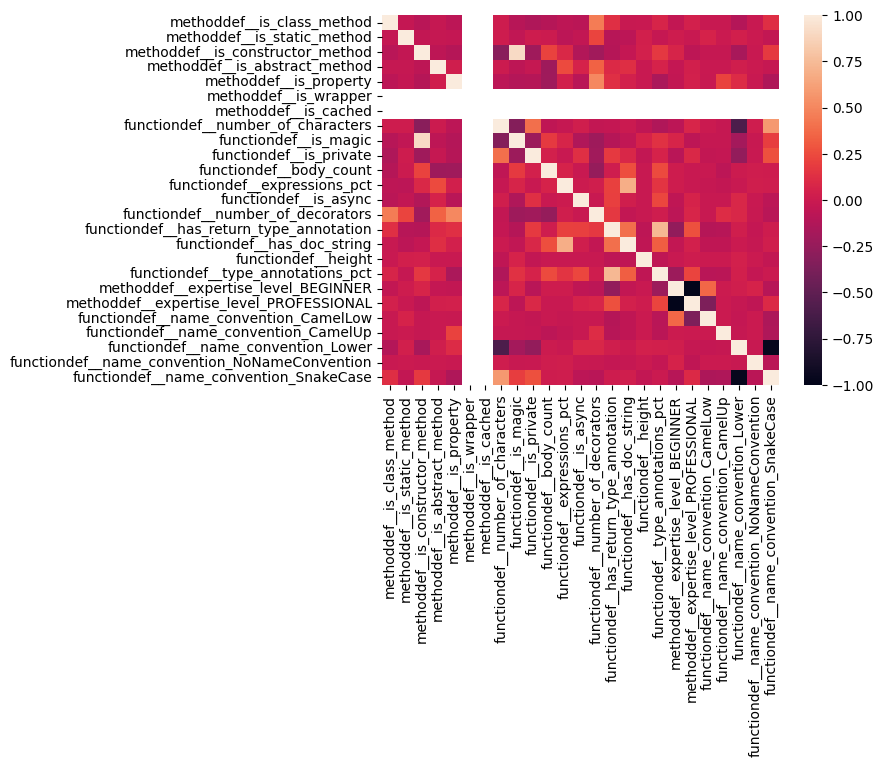

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 19 variable (12 booleanas, 4 numericas, 2 porcentuales y 1 categorica) se hara un analisis detallado

### Variable is_class_method (1/19)
Esta variable es de tipo booleano y representa si el método es de clase.

<Axes: xlabel='methoddef__is_class_method', ylabel='Count'>

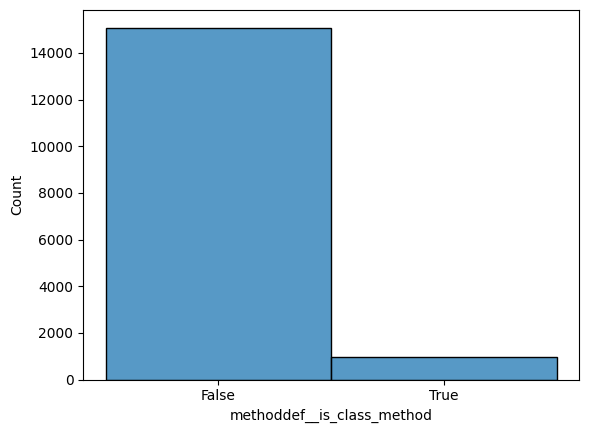

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_class_method'], discrete=True)

In [11]:
num_true_values = len(X[X['methoddef__is_class_method'] == True])
num_false_values = len(X[X['methoddef__is_class_method'] == False])
std = X['methoddef__is_class_method'].std()
freq_true = len(X[X['methoddef__is_class_method'] == True]) / len(X['methoddef__is_class_method'])
freq_false = len(X[X['methoddef__is_class_method'] == False]) / len(X['methoddef__is_class_method'])
print(f'La variable is_class_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_class_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_class_method a False es {freq_false}.')

La variable is_class_method contiene 967 valores verdaderos y 15084 valores falsos. Y, la desviación típica es de 0.237948477268219
La frecuencia con la que programa puede tener la variable is_class_method a True es 0.06024546757211389.
La frecuencia con la que programa puede tener la variable is_class_method a False es 0.9397545324278861.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_class_method', possible_values)

La variable methoddef__is_class_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_class_method toma el valor de 0.0 en un 93.98% de los items.
La variable methoddef__is_class_method toma el valor de 1.0 en un 6.025% de los items.


In [13]:
X[X['methoddef__is_class_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_PROFESSIONAL,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,967.0,967.0,967.0,967.000000,967.0,967.0,967.0,967.000000,967.000000,967.000000,...,967.000000,967.000000,967.000000,967.000000,967.000000,967.0,967.0,967.000000,967.0,967.000000
mean,1.0,0.0,0.0,0.012410,0.0,0.0,0.0,11.688728,0.008273,0.007239,...,0.434333,2.004137,0.619794,0.002068,0.997932,0.0,0.0,0.006205,0.0,0.993795
std,0.0,0.0,0.0,0.110762,0.0,0.0,0.0,3.439406,0.090626,0.084817,...,0.495926,0.064216,0.222987,0.045454,0.045454,0.0,0.0,0.078566,0.0,0.078566
min,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
25%,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,10.000000,0.000000,0.000000,...,0.000000,2.000000,0.500000,0.000000,1.000000,0.0,0.0,0.000000,0.0,1.000000
50%,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,10.000000,0.000000,0.000000,...,0.000000,2.000000,0.500000,0.000000,1.000000,0.0,0.0,0.000000,0.0,1.000000
75%,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,13.000000,0.000000,0.000000,...,1.000000,2.000000,0.800000,0.000000,1.000000,0.0,0.0,0.000000,0.0,1.000000
max,1.0,0.0,0.0,1.000000,0.0,0.0,0.0,33.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000


### Variable is_static_method (2/19)
Esta variable es de tipo booleano y representa si el método es estático.

<Axes: xlabel='methoddef__is_static_method', ylabel='Count'>

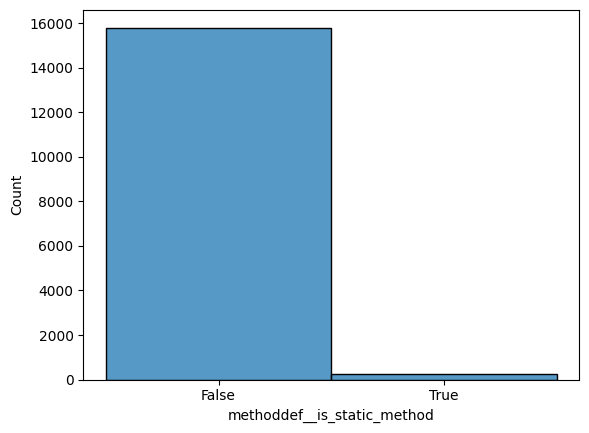

In [14]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_static_method'], discrete=True)

In [15]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_static_method'] == True])
num_false_values = len(X[X['methoddef__is_static_method'] == False])
std = X['methoddef__is_static_method'].std()
freq_true = len(X[X['methoddef__is_static_method'] == True]) / len(X['methoddef__is_static_method'])
freq_false = len(X[X['methoddef__is_static_method'] == False]) / len(X['methoddef__is_static_method'])
print(f'La variable is_static_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_static_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_static_method a False es {freq_false}.')

La variable is_static_method contiene 252 valores verdaderos y 15799 valores falsos. Y, la desviación típica es de 0.12431585043668747
La frecuencia con la que programa puede tener la variable is_static_method a True es 0.01569995638901003.
La frecuencia con la que programa puede tener la variable is_static_method a False es 0.98430004361099.


In [16]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_static_method', possible_values)

La variable methoddef__is_static_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_static_method toma el valor de 0.0 en un 98.43% de los items.
La variable methoddef__is_static_method toma el valor de 1.0 en un 1.57% de los items.


In [17]:
X[X['methoddef__is_static_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_PROFESSIONAL,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.0,252.000000
mean,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.492064,0.003968,0.289683,...,0.178571,2.083333,0.373810,0.047619,0.952381,0.035714,0.003968,0.293651,0.0,0.666667
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.264218,0.062994,0.454518,...,0.383755,0.540215,0.472607,0.213383,0.213383,0.185946,0.062994,0.456340,0.0,0.472343
min,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17.000000,0.000000,1.000000,...,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,1.000000
max,0.0,1.0,0.0,0.0,0.0,0.0,0.0,61.000000,1.000000,1.000000,...,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


### Variable is_constructor_method (3/19)
Esta variable es booleana y representa si el método es un constructor (__ init __).

<Axes: xlabel='methoddef__is_constructor_method', ylabel='Count'>

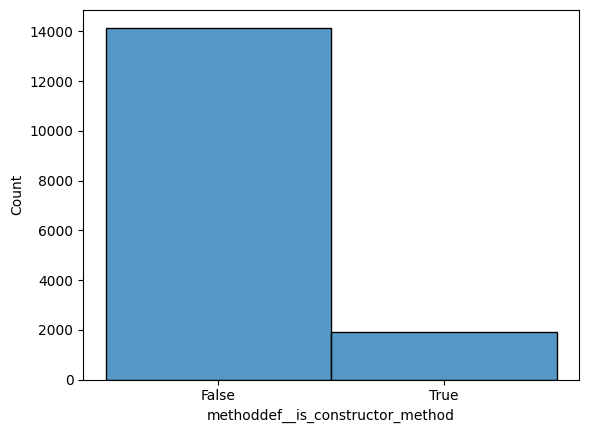

In [18]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_constructor_method'], discrete=True)

In [19]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_constructor_method'] == True])
num_false_values = len(X[X['methoddef__is_constructor_method'] == False])
std = X['methoddef__is_constructor_method'].std()
freq_true = len(X[X['methoddef__is_constructor_method'] == True]) / len(X['methoddef__is_constructor_method'])
freq_false = len(X[X['methoddef__is_constructor_method'] == False]) / len(X['methoddef__is_constructor_method'])
print(f'La variable is_constructor_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_constructor_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_constructor_method a False es {freq_false}.')

La variable is_constructor_method contiene 1903 valores verdaderos y 14148 valores falsos. Y, la desviación típica es de 0.32327964901924133
La frecuencia con la que programa puede tener la variable is_constructor_method a True es 0.11855959130272258.
La frecuencia con la que programa puede tener la variable is_constructor_method a False es 0.8814404086972775.


In [20]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_constructor_method', possible_values)

La variable methoddef__is_constructor_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_constructor_method toma el valor de 0.0 en un 88.14% de los items.
La variable methoddef__is_constructor_method toma el valor de 1.0 en un 11.86% de los items.


In [21]:
X[X['methoddef__is_constructor_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_PROFESSIONAL,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,1903.0,1903.0,1903.0,1903.000000,1903.0,1903.0,1903.0,1903.0,1903.0,1903.0,...,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.0,1903.0,1903.0,1903.0,1903.0
mean,0.0,0.0,1.0,0.001051,0.0,0.0,0.0,8.0,1.0,0.0,...,0.427746,2.030478,0.581738,0.057278,0.942722,0.0,0.0,0.0,0.0,1.0
std,0.0,0.0,0.0,0.032410,0.0,0.0,0.0,0.0,0.0,0.0,...,0.494882,0.249323,0.364762,0.232434,0.232434,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,8.0,1.0,0.0,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
25%,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,8.0,1.0,0.0,...,0.000000,2.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0
50%,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,8.0,1.0,0.0,...,0.000000,2.000000,0.750000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0
75%,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,8.0,1.0,0.0,...,1.000000,2.000000,0.875000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0
max,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,8.0,1.0,0.0,...,1.000000,5.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.0


### Variable is_abstract_method (4/19)
Esta variable es booleana y representa si el método es abstracto.

<Axes: xlabel='methoddef__is_abstract_method', ylabel='Count'>

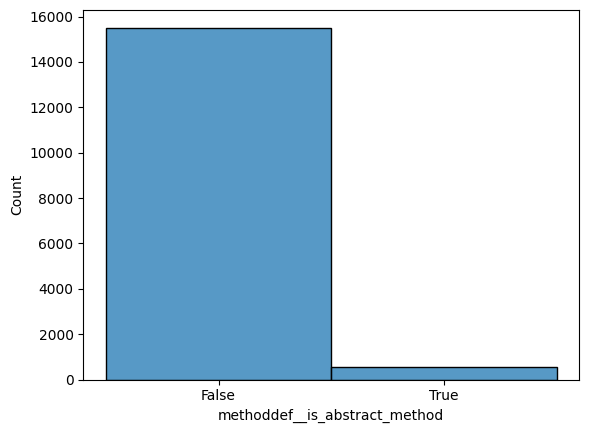

In [22]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_abstract_method'], discrete=True)

In [23]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_abstract_method'] == True])
num_false_values = len(X[X['methoddef__is_abstract_method'] == False])
std = X['methoddef__is_abstract_method'].std()
freq_true = len(X[X['methoddef__is_abstract_method'] == True]) / len(X['methoddef__is_abstract_method'])
freq_false = len(X[X['methoddef__is_abstract_method'] == False]) / len(X['methoddef__is_abstract_method'])
print(f'La variable is_abstract_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_abstract_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_abstract_method a False es {freq_false}.')

La variable is_abstract_method contiene 535 valores verdaderos y 15516 valores falsos. Y, la desviación típica es de 0.17950567603111267
La frecuencia con la que programa puede tener la variable is_abstract_method a True es 0.03333125661952526.
La frecuencia con la que programa puede tener la variable is_abstract_method a False es 0.9666687433804747.


In [24]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_abstract_method', possible_values)

La variable methoddef__is_abstract_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_abstract_method toma el valor de 0.0 en un 96.67% de los items.
La variable methoddef__is_abstract_method toma el valor de 1.0 en un 3.333% de los items.


In [25]:
X[X['methoddef__is_abstract_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_PROFESSIONAL,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,535.000000,535.0,535.000000,535.0,535.000000,535.0,535.0,535.000000,535.000000,535.000000,...,535.000000,535.0,535.000000,535.0,535.0,535.0,535.0,535.000000,535.0,535.000000
mean,0.022430,0.0,0.003738,1.0,0.110280,0.0,0.0,12.514019,0.016822,0.181308,...,0.792523,2.0,0.641086,0.0,1.0,0.0,0.0,0.241122,0.0,0.758879
std,0.148216,0.0,0.061085,0.0,0.313532,0.0,0.0,5.947278,0.128726,0.385634,...,0.405879,0.0,0.177636,0.0,0.0,0.0,0.0,0.428164,0.0,0.428164
min,0.000000,0.0,0.000000,1.0,0.000000,0.0,0.0,2.000000,0.000000,0.000000,...,0.000000,2.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000
25%,0.000000,0.0,0.000000,1.0,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,1.000000,2.0,0.500000,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000
50%,0.000000,0.0,0.000000,1.0,0.000000,0.0,0.0,12.000000,0.000000,0.000000,...,1.000000,2.0,0.666667,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000
75%,0.000000,0.0,0.000000,1.0,0.000000,0.0,0.0,16.000000,0.000000,0.000000,...,1.000000,2.0,0.750000,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000
max,1.000000,0.0,1.000000,1.0,1.000000,0.0,0.0,29.000000,1.000000,1.000000,...,1.000000,2.0,0.875000,0.0,1.0,0.0,0.0,1.000000,0.0,1.000000


### Variable is_property (5/19)
Esta variable es booleana y representa si el método es property.

<Axes: xlabel='methoddef__is_property', ylabel='Count'>

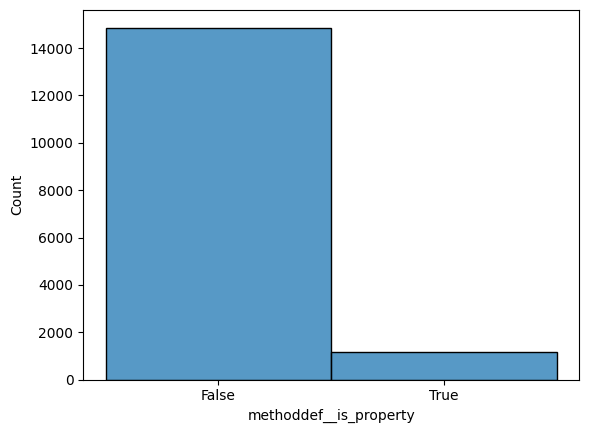

In [26]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_property'], discrete=True)

In [27]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_property'] == True])
num_false_values = len(X[X['methoddef__is_property'] == False])
std = X['methoddef__is_property'].std()
freq_true = len(X[X['methoddef__is_property'] == True]) / len(X['methoddef__is_property'])
freq_false = len(X[X['methoddef__is_property'] == False]) / len(X['methoddef__is_property'])
print(f'La variable is_property contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_property a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_property a False es {freq_false}.')

La variable is_property contiene 1184 valores verdaderos y 14867 valores falsos. Y, la desviación típica es de 0.26139602065086365
La frecuencia con la que programa puede tener la variable is_property a True es 0.0737648744626503.
La frecuencia con la que programa puede tener la variable is_property a False es 0.9262351255373497.


In [28]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_property', possible_values)

La variable methoddef__is_property contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_property toma el valor de 0.0 en un 92.62% de los items.
La variable methoddef__is_property toma el valor de 1.0 en un 7.376% de los items.


In [29]:
X[X['methoddef__is_property'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_PROFESSIONAL,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,1184.0,1184.0,1184.0,1184.000000,1184.0,1184.0,1184.0,1184.000000,1184.0,1184.000000,...,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.0,1184.000000,1184.000000,1184.0,1184.000000
mean,0.0,0.0,0.0,0.049831,1.0,0.0,0.0,10.807432,0.0,0.082770,...,0.546453,2.004223,0.454673,0.005068,0.994932,0.0,0.053209,0.321791,0.0,0.625000
std,0.0,0.0,0.0,0.217688,0.0,0.0,0.0,4.771543,0.0,0.275651,...,0.498048,0.064874,0.146211,0.071036,0.071036,0.0,0.224546,0.467361,0.0,0.484327
min,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,1.000000,0.0,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
25%,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,8.000000,0.0,0.000000,...,0.000000,2.000000,0.500000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000
50%,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,10.000000,0.0,0.000000,...,1.000000,2.000000,0.500000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,1.000000
75%,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,13.000000,0.0,0.000000,...,1.000000,2.000000,0.500000,0.000000,1.000000,0.0,0.000000,1.000000,0.0,1.000000
max,0.0,0.0,0.0,1.000000,1.0,0.0,0.0,32.000000,0.0,1.000000,...,1.000000,3.000000,0.666667,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000


### Variable is_wrapper (6/19)
Esta variable es booleana y representa si el método es wrapper.

<Axes: xlabel='methoddef__is_wrapper', ylabel='Count'>

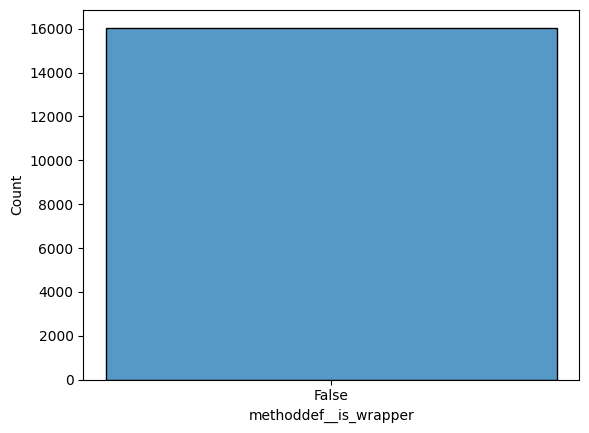

In [30]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_wrapper'], discrete=True)

In [31]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_wrapper'] == True])
num_false_values = len(X[X['methoddef__is_wrapper'] == False])
std = X['methoddef__is_wrapper'].std()
freq_true = len(X[X['methoddef__is_wrapper'] == True]) / len(X['methoddef__is_wrapper'])
freq_false = len(X[X['methoddef__is_wrapper'] == False]) / len(X['methoddef__is_wrapper'])
print(f'La variable is_wrapper contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_wrapper a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_wrapper a False es {freq_false}.')

La variable is_wrapper contiene 0 valores verdaderos y 16051 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable is_wrapper a True es 0.0.
La frecuencia con la que programa puede tener la variable is_wrapper a False es 1.0.


In [32]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_wrapper', possible_values)

La variable methoddef__is_wrapper contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_wrapper toma el valor de 0.0 en un 100.0% de los items.
La variable methoddef__is_wrapper toma el valor de True en un 0.0% de los items. [OUTLIER]


In [33]:
X[X['methoddef__is_wrapper'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_PROFESSIONAL,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
No hay ninguna función que sea wrapper.

### Variable is_cached (7/19)
Esta variable es booleana y representa si el método es cached.

<Axes: xlabel='methoddef__is_cached', ylabel='Count'>

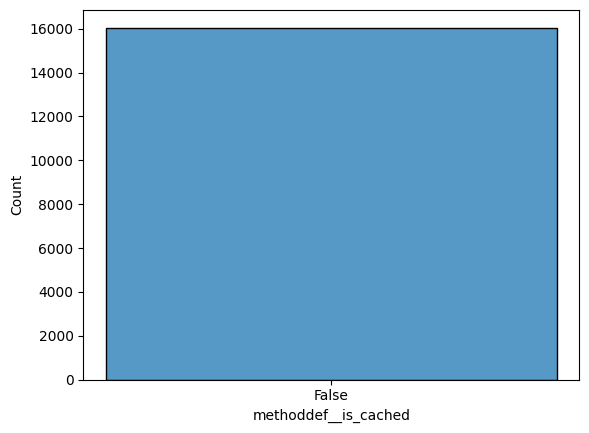

In [34]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_cached'], discrete=True)

In [35]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_cached'] == True])
num_false_values = len(X[X['methoddef__is_cached'] == False])
std = X['methoddef__is_cached'].std()
freq_true = len(X[X['methoddef__is_cached'] == True]) / len(X['methoddef__is_cached'])
freq_false = len(X[X['methoddef__is_cached'] == False]) / len(X['methoddef__is_cached'])
print(f'La variable is_cached contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_cached a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_cached a False es {freq_false}.')

La variable is_cached contiene 0 valores verdaderos y 16051 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable is_cached a True es 0.0.
La frecuencia con la que programa puede tener la variable is_cached a False es 1.0.


In [36]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_cached', possible_values)

La variable methoddef__is_cached contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_cached toma el valor de 0.0 en un 100.0% de los items.
La variable methoddef__is_cached toma el valor de True en un 0.0% de los items. [OUTLIER]


In [37]:
X[X['methoddef__is_cached'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_PROFESSIONAL,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
No hay ninguna función que sea cached.

### Variable is_private (8/19)
Esta variable es de tipo booleano y representa si la función es privada.

<Axes: xlabel='functiondef__is_private', ylabel='Count'>

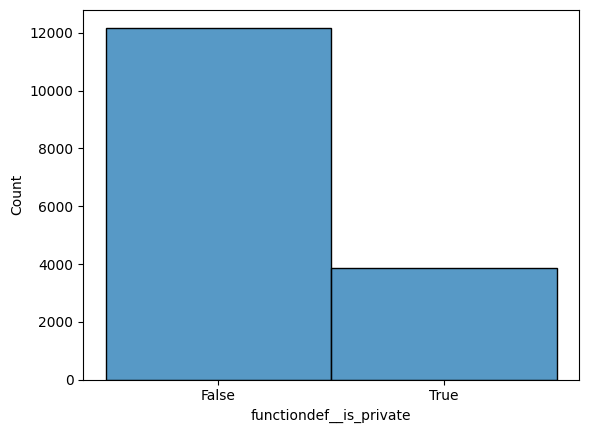

In [38]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_private'], discrete=True)

In [39]:
num_true_values = len(X[X['functiondef__is_private'] == True])
num_false_values = len(X[X['functiondef__is_private'] == False])
std = X['functiondef__is_private'].std()
freq_true = len(X[X['functiondef__is_private'] == True]) / len(X['functiondef__is_private'])
freq_false = len(X[X['functiondef__is_private'] == False]) / len(X['functiondef__is_private'])
print(f'La variable is_private contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_private a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_private a False es {freq_false}.')

La variable is_private contiene 3865 valores verdaderos y 12186 valores falsos. Y, la desviación típica es de 0.427579402923584
La frecuencia con la que programa puede tener la variable is_private a True es 0.24079496604572923.
La frecuencia con la que programa puede tener la variable is_private a False es 0.7592050339542707.


In [40]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_private', possible_values)

La variable functiondef__is_private contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_private toma el valor de 0.0 en un 75.92% de los items.
La variable functiondef__is_private toma el valor de 1.0 en un 24.08% de los items.


In [41]:
X[X['functiondef__is_private'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_PROFESSIONAL,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,3865.000000,3865.000000,3865.0,3865.000000,3865.000000,3865.0,3865.0,3865.000000,3865.0,3865.0,...,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.0,3865.0,3865.0,3865.000000,3865.000000
mean,0.001811,0.018887,0.0,0.025097,0.025356,0.0,0.0,17.194307,0.0,1.0,...,0.544631,2.002070,0.569406,0.002587,0.997413,0.0,0.0,0.0,0.000776,0.999224
std,0.042524,0.136145,0.0,0.156440,0.157224,0.0,0.0,6.372273,0.0,0.0,...,0.498069,0.068221,0.255963,0.050806,0.050806,0.0,0.0,0.0,0.027853,0.027853
min,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,3.000000,0.0,1.0,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,13.000000,0.0,1.0,...,0.000000,2.000000,0.500000,0.000000,1.000000,0.0,0.0,0.0,0.000000,1.000000
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,17.000000,0.0,1.0,...,1.000000,2.000000,0.666667,0.000000,1.000000,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,21.000000,0.0,1.0,...,1.000000,2.000000,0.750000,0.000000,1.000000,0.0,0.0,0.0,0.000000,1.000000
max,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,52.000000,0.0,1.0,...,1.000000,5.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000


### Variable is_magic (9/19)
Esta variable es de tipo booleano y representa si la función es de la forma __\w__.

<Axes: xlabel='functiondef__is_magic', ylabel='Count'>

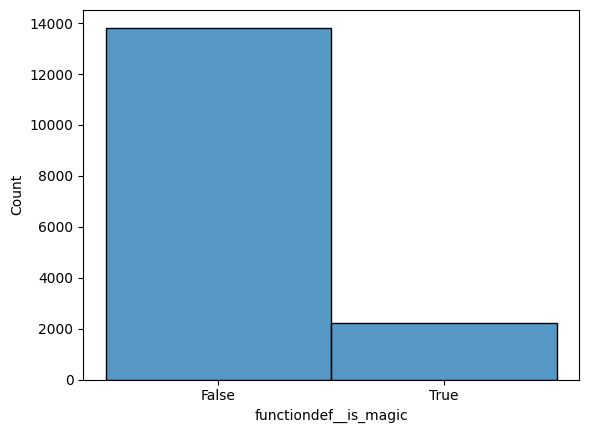

In [42]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_magic'], discrete=True)

In [43]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_magic'] == True])
num_false_values = len(X[X['functiondef__is_magic'] == False])
std = X['functiondef__is_magic'].std()
freq_true = len(X[X['functiondef__is_magic'] == True]) / len(X['functiondef__is_magic'])
freq_false = len(X[X['functiondef__is_magic'] == False]) / len(X['functiondef__is_magic'])
print(f'La variable is_magic contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_magic a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_magic a False es {freq_false}.')

La variable is_magic contiene 2229 valores verdaderos y 13822 valores falsos. Y, la desviación típica es de 0.34582144021987915
La frecuencia con la que programa puede tener la variable is_magic a True es 0.13886985234564825.
La frecuencia con la que programa puede tener la variable is_magic a False es 0.8611301476543518.


In [44]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_magic', possible_values)

La variable functiondef__is_magic contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_magic toma el valor de 0.0 en un 86.11% de los items.
La variable functiondef__is_magic toma el valor de 1.0 en un 13.89% de los items.


In [45]:
X[X['functiondef__is_magic'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_PROFESSIONAL,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.0,2229.0,2229.0,2229.000000,2229.0,2229.0,...,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.0,2229.0,2229.0,2229.0,2229.0
mean,0.003589,0.000449,0.853746,0.004038,0.0,0.0,0.0,8.091521,1.0,0.0,...,0.407358,2.033647,0.557991,0.055630,0.944370,0.0,0.0,0.0,0.0,1.0
std,0.059815,0.021181,0.353440,0.063429,0.0,0.0,0.0,0.947767,0.0,0.0,...,0.491453,0.261604,0.361651,0.229258,0.229258,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,6.000000,1.0,0.0,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
25%,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,8.000000,1.0,0.0,...,0.000000,2.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0
50%,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,8.000000,1.0,0.0,...,0.000000,2.000000,0.750000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0
75%,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,8.000000,1.0,0.0,...,1.000000,2.000000,0.857143,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,28.000000,1.0,0.0,...,1.000000,5.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.0


### Variable is_async (10/19)
Esta variable es booleana y representa si la función es asincrona.

<Axes: xlabel='functiondef__is_async', ylabel='Count'>

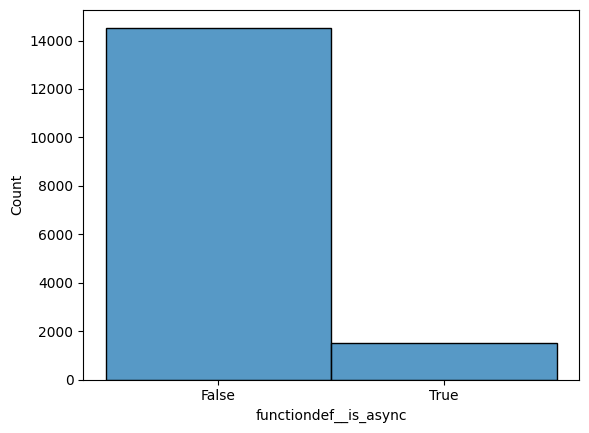

In [46]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_async'], discrete=True)

In [47]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_async'] == True])
num_false_values = len(X[X['functiondef__is_async'] == False])
std = X['functiondef__is_async'].std()
freq_true = len(X[X['functiondef__is_async'] == True]) / len(X['functiondef__is_async'])
freq_false = len(X[X['functiondef__is_async'] == False]) / len(X['functiondef__is_async'])
print(f'La variable is_async contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_async a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_async a False es {freq_false}.')

La variable is_async contiene 1517 valores verdaderos y 14534 valores falsos. Y, la desviación típica es de 0.2925477623939514
La frecuencia con la que programa puede tener la variable is_async a True es 0.0945112454052707.
La frecuencia con la que programa puede tener la variable is_async a False es 0.9054887545947293.


In [48]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_async', possible_values)

La variable functiondef__is_async contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_async toma el valor de 0.0 en un 90.55% de los items.
La variable functiondef__is_async toma el valor de 1.0 en un 9.451% de los items.


In [49]:
X[X['functiondef__is_async'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_PROFESSIONAL,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,1517.0,1517.0,1517.0,1517.000000,1517.0,1517.0,1517.0,1517.000000,1517.000000,1517.000000,...,1517.000000,1517.000000,1517.000000,1517.0,1517.0,1517.0,1517.0,1517.000000,1517.0,1517.000000
mean,0.0,0.0,0.0,0.066579,0.0,0.0,0.0,13.288728,0.001978,0.409361,...,0.514173,2.002637,0.724567,0.0,1.0,0.0,0.0,0.278840,0.0,0.721160
std,0.0,0.0,0.0,0.249373,0.0,0.0,0.0,6.421103,0.044441,0.491878,...,0.499964,0.051299,0.103903,0.0,0.0,0.0,0.0,0.448576,0.0,0.448576
min,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000
25%,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,8.000000,0.000000,0.000000,...,0.000000,2.000000,0.666667,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000
50%,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,12.000000,0.000000,0.000000,...,1.000000,2.000000,0.750000,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000
75%,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,19.000000,0.000000,1.000000,...,1.000000,2.000000,0.800000,0.0,1.0,0.0,0.0,1.000000,0.0,1.000000
max,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,31.000000,1.000000,1.000000,...,1.000000,3.000000,0.900000,0.0,1.0,0.0,0.0,1.000000,0.0,1.000000


### Variable has_return_type_annotation (11/19)
Esta variable es booleana y representa si la function tiene una anotacion del tipo de retorno.

<Axes: xlabel='functiondef__has_return_type_annotation', ylabel='Count'>

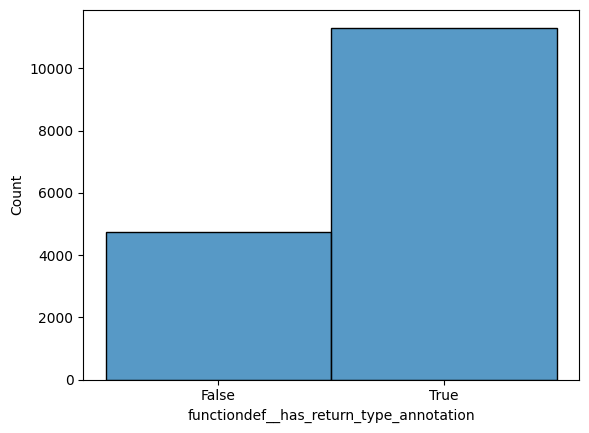

In [50]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_return_type_annotation'], discrete=True)

In [51]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_return_type_annotation'] == True])
num_false_values = len(X[X['functiondef__has_return_type_annotation'] == False])
std = X['functiondef__has_return_type_annotation'].std()
freq_true = len(X[X['functiondef__has_return_type_annotation'] == True]) / len(X['functiondef__has_return_type_annotation'])
freq_false = len(X[X['functiondef__has_return_type_annotation'] == False]) / len(X['functiondef__has_return_type_annotation'])
print(f'La variable has_return_type_annotation contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es {freq_false}.')

La variable has_return_type_annotation contiene 11311 valores verdaderos y 4740 valores falsos. Y, la desviación típica es de 0.4561956226825714
La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es 0.7046912964924303.
La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es 0.2953087035075696.


In [52]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_return_type_annotation', possible_values)

La variable functiondef__has_return_type_annotation contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_return_type_annotation toma el valor de 1.0 en un 70.47% de los items.
La variable functiondef__has_return_type_annotation toma el valor de 0.0 en un 29.53% de los items.


In [53]:
X[X['functiondef__has_return_type_annotation'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_PROFESSIONAL,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,11311.000000,11311.000000,11311.000000,11311.000000,11311.000000,11311.0,11311.0,11311.000000,11311.000000,11311.000000,...,11311.000000,11311.000000,11311.000000,11311.0,11311.0,11311.000000,11311.000000,11311.000000,11311.000000,11311.000000
mean,0.080364,0.007868,0.096013,0.044912,0.094952,0.0,0.0,12.579878,0.115728,0.288834,...,0.601096,2.004244,0.682323,0.0,1.0,0.000265,0.000088,0.185395,0.000796,0.813456
std,0.271868,0.088358,0.294622,0.207120,0.293161,0.0,0.0,6.432081,0.319913,0.453241,...,0.489695,0.080777,0.131606,0.0,0.0,0.016284,0.009403,0.388635,0.028198,0.389562
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.000000,0.000000,0.000000,...,0.000000,2.000000,0.071429,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,0.000000,2.000000,0.500000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.000000,0.000000,0.000000,...,1.000000,2.000000,0.666667,0.0,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,16.000000,0.000000,1.000000,...,1.000000,2.000000,0.750000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,64.000000,1.000000,1.000000,...,1.000000,4.000000,1.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable has_doc_string (12/19)
Esta variable es booleana y representa si la function comienza por un String plano a modo de comentario.

<Axes: xlabel='functiondef__has_doc_string', ylabel='Count'>

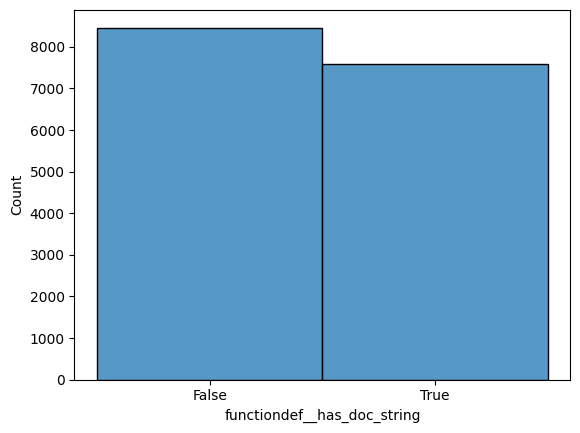

In [54]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_doc_string'], discrete=True)

In [55]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_doc_string'] == True])
num_false_values = len(X[X['functiondef__has_doc_string'] == False])
std = X['functiondef__has_doc_string'].std()
freq_true = len(X[X['functiondef__has_doc_string'] == True]) / len(X['functiondef__has_doc_string'])
freq_false = len(X[X['functiondef__has_doc_string'] == False]) / len(X['functiondef__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 7588 valores verdaderos y 8463 valores falsos. Y, la desviación típica es de 0.49927207827568054
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.4727431312690798.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.5272568687309201.


In [56]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_doc_string', possible_values)

La variable functiondef__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_doc_string toma el valor de 0.0 en un 52.73% de los items.
La variable functiondef__has_doc_string toma el valor de 1.0 en un 47.27% de los items.


In [57]:
X[X['functiondef__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_PROFESSIONAL,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.0,7588.0,7588.000000,7588.000000,7588.000000,...,7588.0,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,0.055351,0.005930,0.107275,0.055878,0.085266,0.0,0.0,12.739061,0.119663,0.277412,...,1.0,2.002240,0.631844,0.021481,0.978519,0.000527,0.000395,0.176199,0.000527,0.822351
std,0.228678,0.076786,0.309483,0.229701,0.279296,0.0,0.0,6.570474,0.324588,0.447751,...,0.0,0.059613,0.222753,0.144992,0.144992,0.022955,0.019881,0.381015,0.022955,0.382242
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,1.0,2.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.000000,0.000000,0.000000,...,1.0,2.000000,0.666667,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.000000,0.000000,1.000000,...,1.0,2.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,61.000000,1.000000,1.000000,...,1.0,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable number_of_characters (13/19)
Esta variable representa el número de caracteres que tiene el nombre de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 64. Con una media de 12.87.

<Axes: ylabel='functiondef__number_of_characters'>

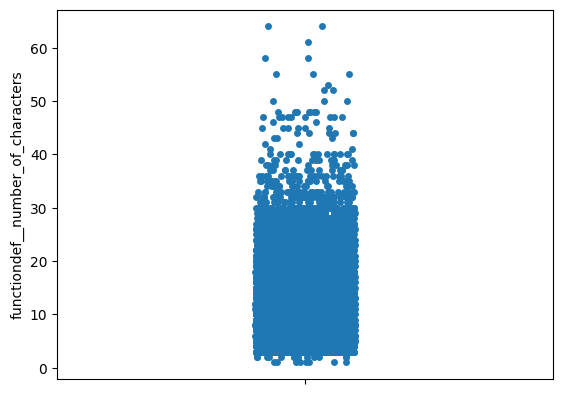

In [58]:
sns.stripplot(X['functiondef__number_of_characters'])

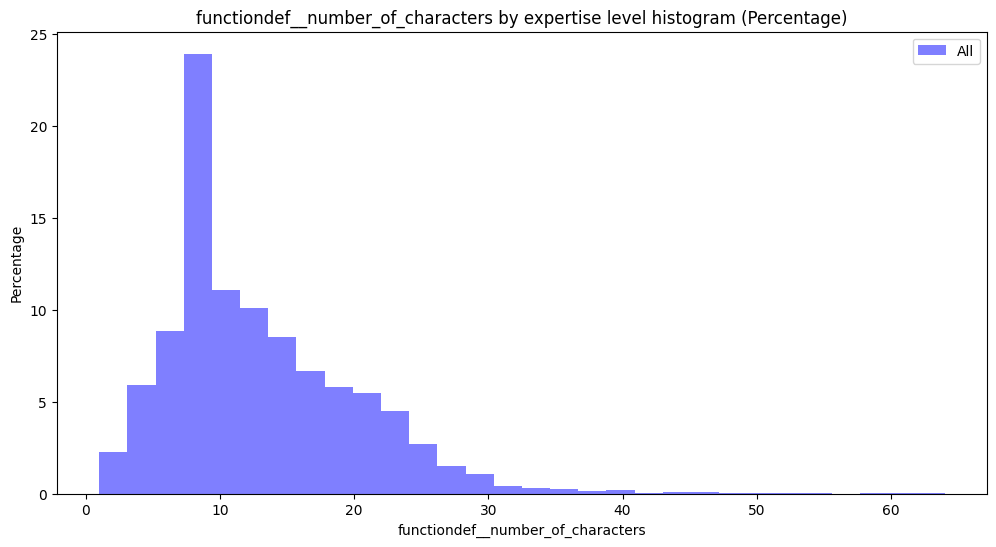

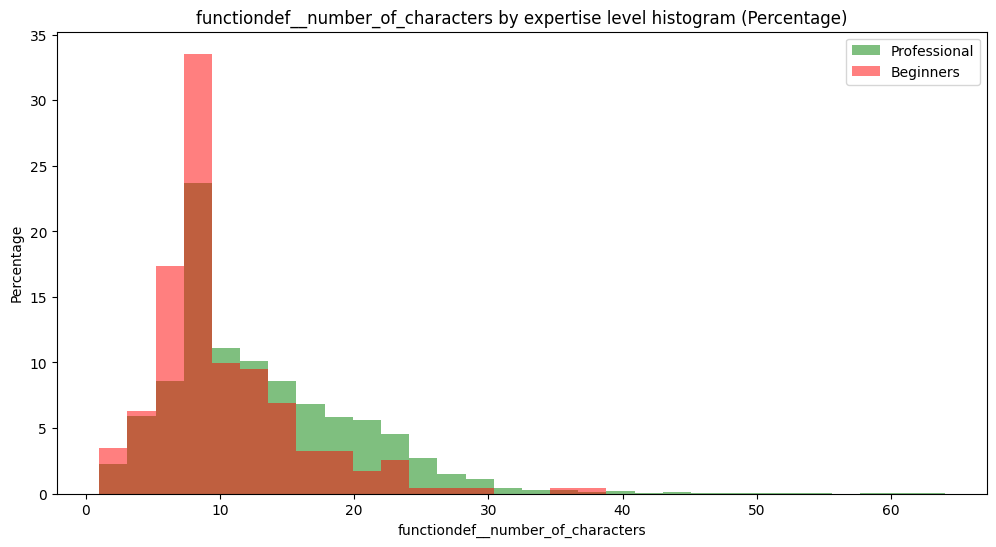

In [59]:
print_histogram(X, 'functiondef__number_of_characters', 'methoddef__expertise_level', bins=30, include_all=True, include_beginners=False, include_experts=False)
print_histogram(X, 'functiondef__number_of_characters', 'methoddef__expertise_level', bins=30, include_all=False)

In [60]:
print_outliers_for_df_column(X, 'functiondef__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6699547956860255
Rango valores atípicos extremos (Tukey): [-19.0,44.0]
Rango valores atípicos leves (Tukey): [-5.5,30.5]
Rango valores atípicos extremos (Fixed BoxPlot): [6.705858034635852,213.86316001960577]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -19.0 (Q1-3*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -5.5 (Q1-1.5*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 258 instancias tienen un valor para functiondef__number_of_characters superior a 30.5 (Q3+1.5*IQR) para functiondef__number_of_characters. Representando un 1.607% del total de instancias.
+3.0IQR: 39 instancias tienen un valor para functiondef__number_of_characters superior a 44.0 (Q3-3*IQR) para functiondef__number_of_characters. Repr

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 44.0 (Con un MC de 67 usamos Tuckey Extremo)

In [88]:
X[X['functiondef__number_of_characters'] > 44].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_PROFESSIONAL,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,39.0,39.000000,39.0,39.0,39.0,39.0,39.0,39.000000,39.0,39.000000,...,39.000000,39.0,39.000000,39.0,39.0,39.0,39.0,39.0,39.0,39.0
mean,0.0,0.051282,0.0,0.0,0.0,0.0,0.0,49.897434,0.0,0.076923,...,0.179487,2.0,0.243590,0.0,1.0,0.0,0.0,0.0,0.0,1.0
std,0.0,0.223456,0.0,0.0,0.0,0.0,0.0,5.200177,0.0,0.269953,...,0.388776,0.0,0.253185,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,45.000000,0.0,0.000000,...,0.000000,2.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
25%,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,47.000000,0.0,0.000000,...,0.000000,2.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
50%,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,48.000000,0.0,0.000000,...,0.000000,2.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
75%,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,52.000000,0.0,0.000000,...,0.000000,2.0,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
max,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,64.000000,0.0,1.000000,...,1.000000,2.0,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Variable body_count (14/19)
Esta variable representa el número de sentencias en el root de la función. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 111. Con una media de 3,81.

<Axes: ylabel='functiondef__body_count'>

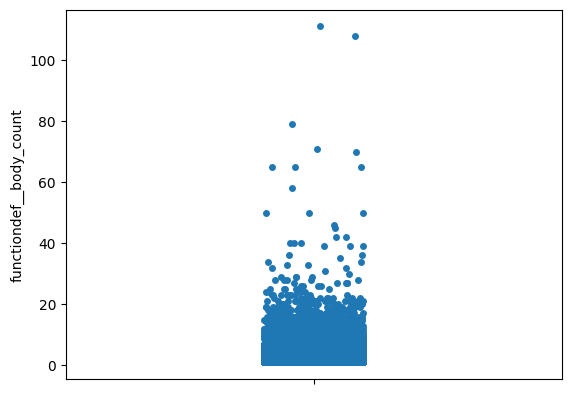

In [62]:
sns.stripplot(X['functiondef__body_count'])

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

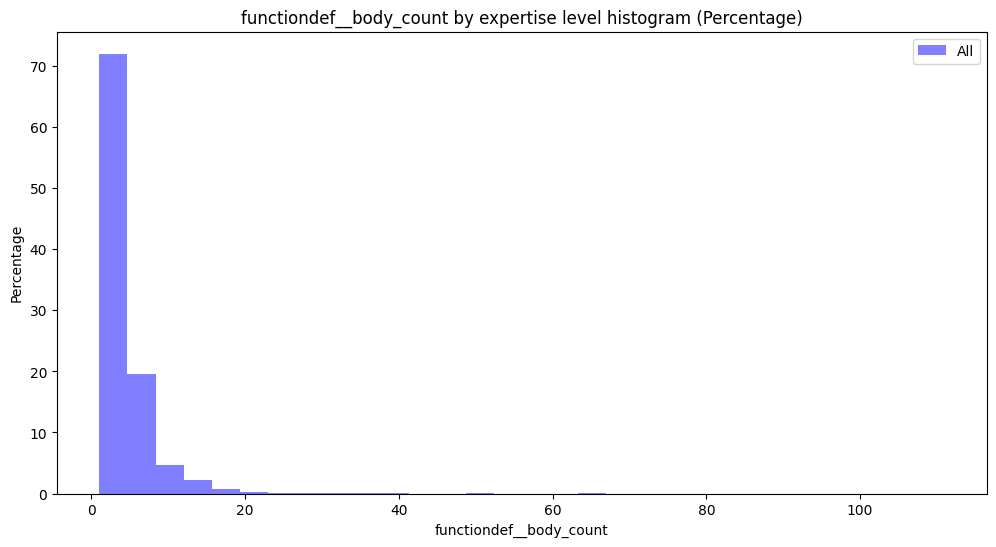

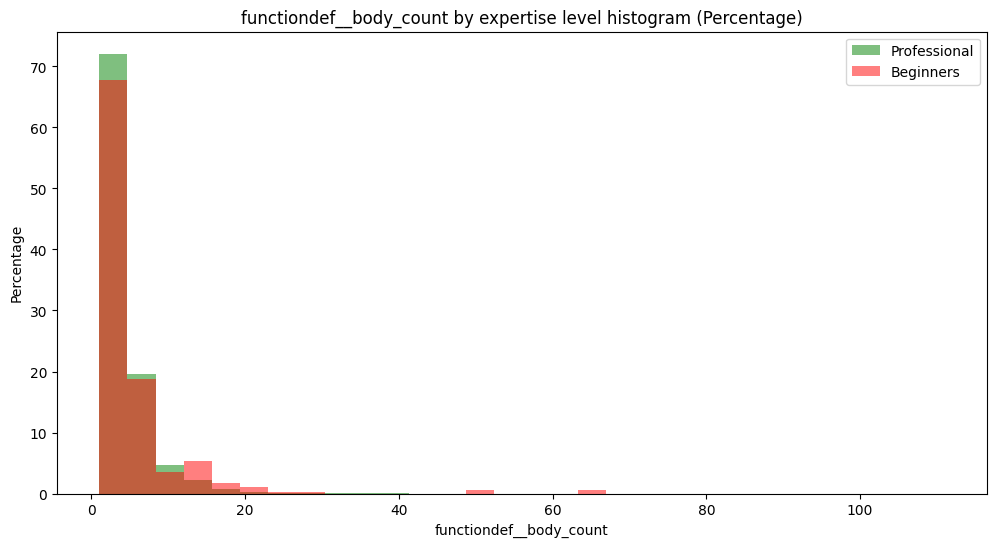

In [63]:
print_histogram(X, 'functiondef__body_count', 'methoddef__expertise_level', bins=30, include_all=True, include_beginners=False, include_experts=False)
print_histogram(X, 'functiondef__body_count', 'methoddef__expertise_level', bins=30, include_all=False, max_value=250)

In [64]:
print_outliers_for_df_column(X, 'functiondef__body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8732436524531355
Rango valores atípicos extremos (Tukey): [-11.0,17.0]
Rango valores atípicos leves (Tukey): [-5.0,11.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.7176458978467092,202.30170981158162]
-3.0IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -11.0 (Q1-3*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -5.0 (Q1-1.5*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 622 instancias tienen un valor para functiondef__body_count superior a 11.0 (Q3+1.5*IQR) para functiondef__body_count. Representando un 3.875% del total de instancias.
+3.0IQR: 176 instancias tienen un valor para functiondef__body_count superior a 17.0 (Q3-3*IQR) para functiondef__body_count. Representando un 1.097% del total de instancias.
L: 0 instancias tienen un valor p

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 17 (Con un MC de 87 usamos Tukey Extremo)

In [89]:
X[X['functiondef__body_count'] > 17].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_PROFESSIONAL,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,176.000000,176.000000,176.000000,176.0,176.0,176.0,176.0,176.000000,176.000000,176.000000,...,176.000000,176.0,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.0,176.000000
mean,0.034091,0.062500,0.335227,0.0,0.0,0.0,0.0,11.823864,0.335227,0.113636,...,0.426136,2.0,0.280634,0.090909,0.909091,0.045455,0.017045,0.181818,0.0,0.755682
std,0.181980,0.242752,0.473417,0.0,0.0,0.0,0.0,7.606591,0.473417,0.318275,...,0.495925,0.0,0.400125,0.288300,0.288300,0.208893,0.129810,0.386795,0.0,0.430908
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000,0.000000,0.000000,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,8.000000,0.000000,0.000000,...,0.000000,2.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,8.000000,0.000000,0.000000,...,0.000000,2.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,15.000000,1.000000,0.000000,...,1.000000,2.0,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,39.000000,1.000000,1.000000,...,1.000000,2.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


### Variable number_of_decorators (15/19)
Esta variable representa el número de decoradores de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 3. Con una media de 0.248.

<Axes: ylabel='functiondef__number_of_decorators'>

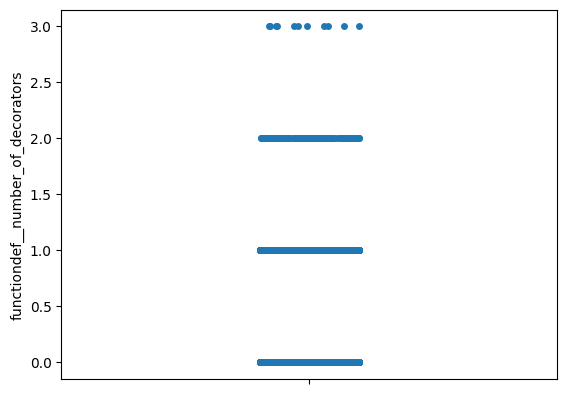

In [66]:
sns.stripplot(X['functiondef__number_of_decorators'])

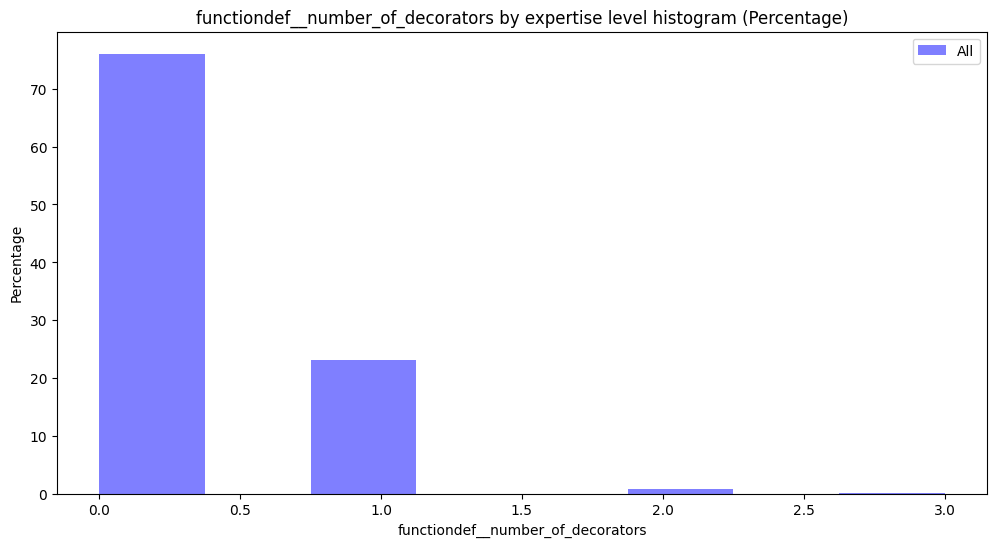

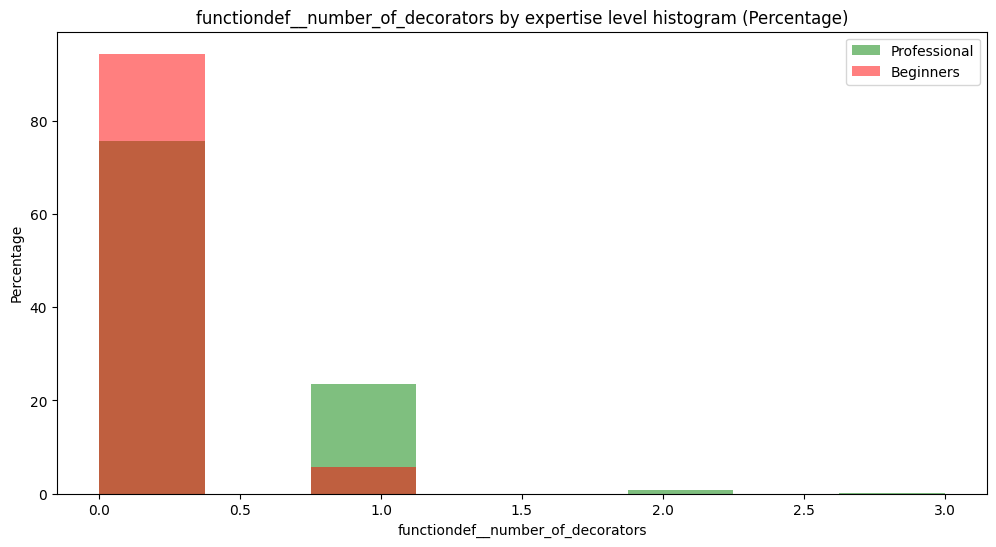

In [67]:
print_histogram(X, 'functiondef__number_of_decorators', 'methoddef__expertise_level', bins=8, include_all=True, include_beginners=False, include_experts=False)
print_histogram(X, 'functiondef__number_of_decorators', 'methoddef__expertise_level', bins=8, include_all=False)

In [68]:
print_outliers_for_df_column(X, 'functiondef__number_of_decorators')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6855311454575882
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-3*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-1.5*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
+1.5IQR: 3838 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3+1.5*IQR) para functiondef__number_of_decorators. Representando un 23.91% del total de instancias.
+3.0IQR: 3838 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3-3*IQR) para functiondef__number_of_decorators. Representando un 23.91% del total de ins

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [69]:
X[X['functiondef__number_of_decorators'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_PROFESSIONAL,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.0,3838.0,3838.000000,3838.000000,3838.000000,...,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.0,3838.000000
mean,0.251954,0.065659,0.001563,0.139396,0.308494,0.0,0.0,11.854611,0.006514,0.086243,...,0.434341,2.008077,0.545695,0.006774,0.993226,0.002345,0.016675,0.234497,0.0,0.746483
std,0.434192,0.247718,0.039513,0.346404,0.461932,0.0,0.0,5.657611,0.080455,0.280759,...,0.495735,0.148619,0.269354,0.082038,0.082038,0.048374,0.128069,0.423739,0.0,0.435081
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,0.000000,2.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,10.000000,0.000000,0.000000,...,0.000000,2.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,15.000000,0.000000,0.000000,...,1.000000,2.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,61.000000,1.000000,1.000000,...,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


### Variable height (16/19)
Esta variable representa la distancia desde la función hasta el root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 2 - 6. Con una media de 2.01.

<Axes: ylabel='functiondef__height'>

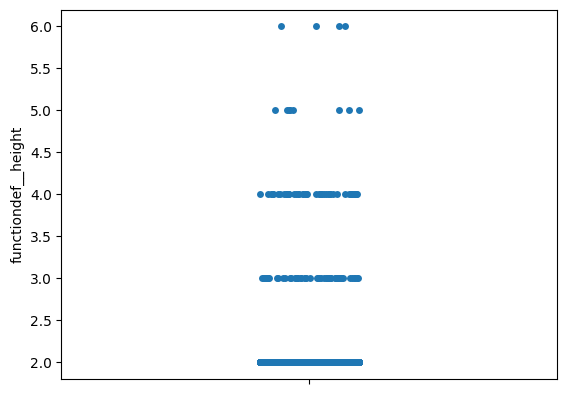

In [70]:
sns.stripplot(X['functiondef__height'])

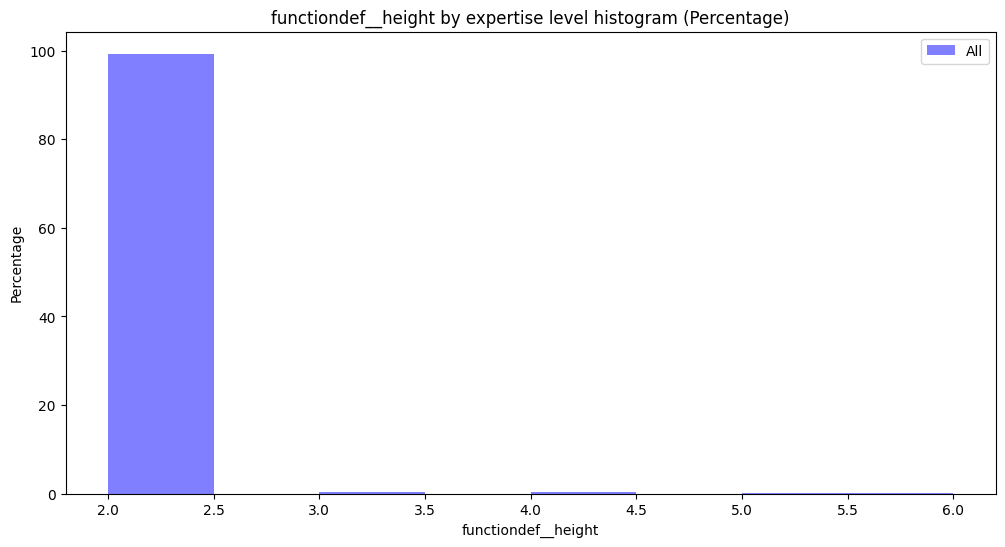

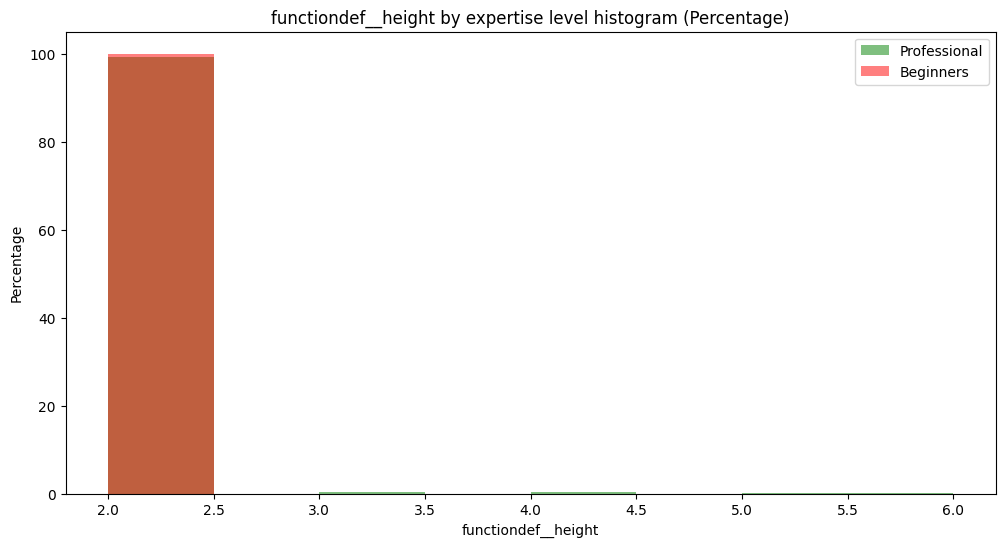

In [71]:
print_histogram(X, 'functiondef__height', 'methoddef__expertise_level', bins=8, include_all=True, include_beginners=False, include_experts=False)
print_histogram(X, 'functiondef__height', 'methoddef__expertise_level', bins=8, include_all=False)

In [72]:
print_outliers_for_df_column(X, 'functiondef__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 1.0
Rango valores atípicos extremos (Tukey): [2.0,2.0]
Rango valores atípicos leves (Tukey): [2.0,2.0]
Rango valores atípicos extremos (Fixed BoxPlot): [2.0,2.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__height inferior a 2.0 (Q1-3*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__height inferior a 2.0 (Q1-1.5*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
+1.5IQR: 108 instancias tienen un valor para functiondef__height superior a 2.0 (Q3+1.5*IQR) para functiondef__height. Representando un 0.6729% del total de instancias.
+3.0IQR: 108 instancias tienen un valor para functiondef__height superior a 2.0 (Q3-3*IQR) para functiondef__height. Representando un 0.6729% del total de instancias.
L: 0 instancias tienen un valor para functiondef__height inferior a 2.0 para functiondef__height. Representando un 0.0

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 2 (Todos los umbrales son 2)

In [90]:
X[X['functiondef__height'] > 2].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_PROFESSIONAL,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,108.000000,108.000000,108.000000,108.0,108.000000,108.0,108.0,108.000000,108.000000,108.000000,...,108.000000,108.000000,108.000000,108.0,108.0,108.0,108.0,108.000000,108.0,108.000000
mean,0.037037,0.064815,0.287037,0.0,0.046296,0.0,0.0,9.111111,0.379630,0.037037,...,0.120370,3.675926,0.219753,0.0,1.0,0.0,0.0,0.379630,0.0,0.620370
std,0.189733,0.247347,0.454488,0.0,0.211106,0.0,0.0,4.799403,0.487557,0.189733,...,0.326911,0.771316,0.326393,0.0,0.0,0.0,0.0,0.487557,0.0,0.487557
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,3.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,7.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,0.000000,4.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000
75%,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,8.250000,1.000000,0.000000,...,0.000000,4.000000,0.666667,0.0,1.0,0.0,0.0,1.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,31.000000,1.000000,1.000000,...,1.000000,6.000000,1.000000,0.0,1.0,0.0,0.0,1.000000,0.0,1.000000


### Variable expressions_pct (17/19)
Esta variable representa la proporción de las sentencias en el root de la funcsion que son expresiones. Toma los valores de 0.0 - 1.0. La media es 0.256.

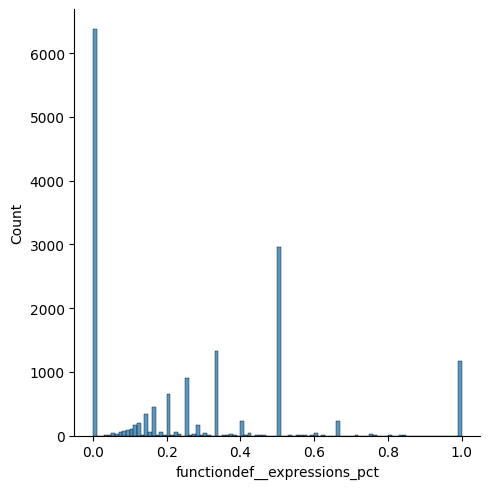

In [74]:
sns.displot(X['functiondef__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

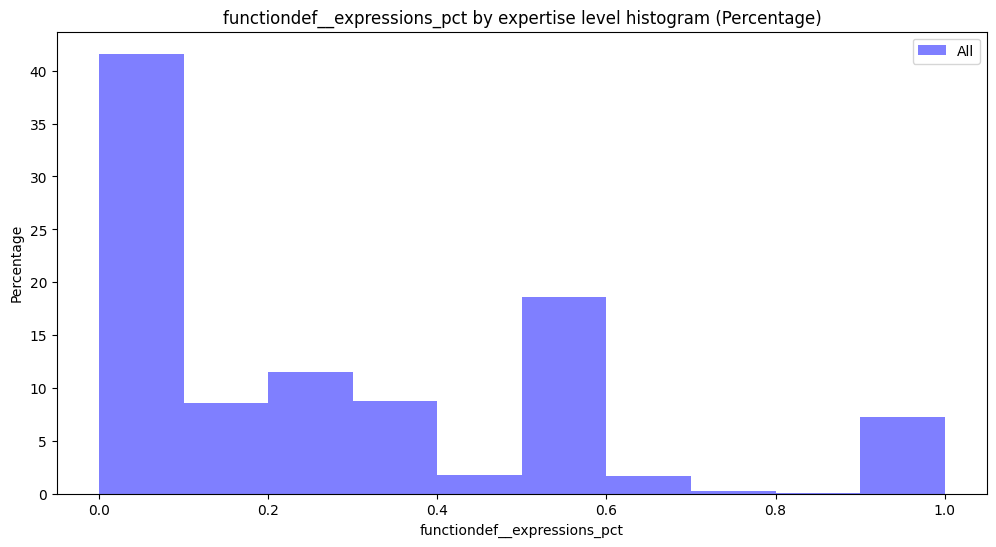

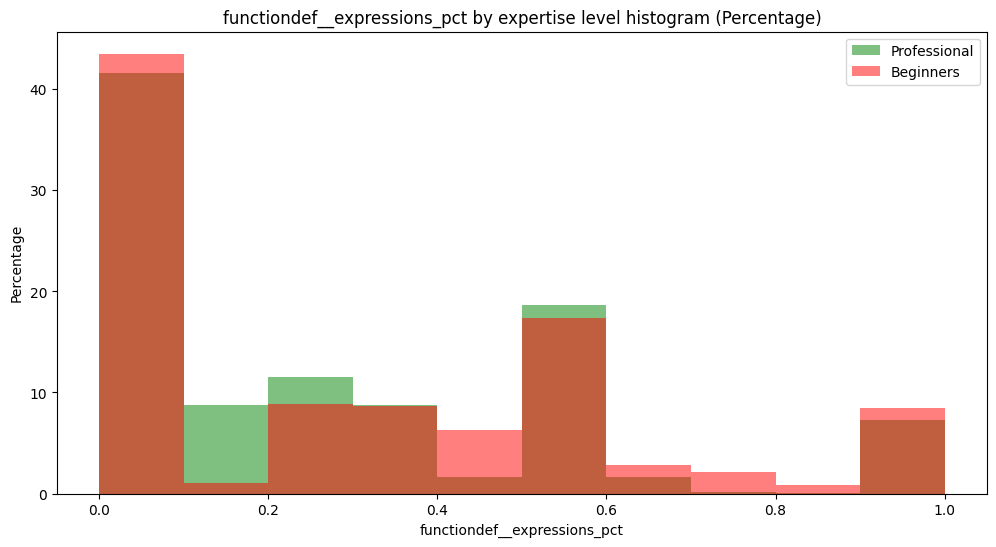

In [75]:
print_histogram(X, 'functiondef__expressions_pct', 'methoddef__expertise_level', bins=10, include_all=True, include_beginners=False, include_experts=False)
print_histogram(X, 'functiondef__expressions_pct', 'methoddef__expertise_level', bins=10, include_all=False)

In [76]:
print_outliers_for_df_column(X, 'functiondef__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4543443024158478
Rango valores atípicos extremos (Tukey): [-1.5,2.0]
Rango valores atípicos leves (Tukey): [-0.75,1.25]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.15291284951278422,5.116769126624375]
-3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -1.5 (Q1-3*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -0.75 (Q1-1.5*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para functiondef__expressions_pct superior a 1.25 (Q3+1.5*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct superior a 2.0 (Q3-3*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
L:

In [77]:
X[X['functiondef__expressions_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_PROFESSIONAL,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,9677.000000,9677.000000,9677.000000,9677.000000,9677.000000,9677.0,9677.0,9677.000000,9677.000000,9677.000000,...,9677.000000,9677.000000,9677.000000,9677.000000,9677.000000,9677.000000,9677.000000,9677.000000,9677.000000,9677.000000
mean,0.046812,0.008267,0.160897,0.049085,0.068203,0.0,0.0,12.822052,0.174641,0.245427,...,0.784127,2.008990,0.569775,0.027178,0.972822,0.002893,0.001240,0.165134,0.002377,0.828356
std,0.211247,0.090551,0.367455,0.216058,0.252107,0.0,0.0,7.090302,0.379679,0.430362,...,0.411448,0.138728,0.291024,0.162610,0.162610,0.053716,0.035194,0.371320,0.048697,0.377090
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,1.000000,2.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.000000,0.000000,0.000000,...,1.000000,2.000000,0.666667,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.000000,0.000000,0.000000,...,1.000000,2.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,64.000000,1.000000,1.000000,...,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Importante
El 49% de los metodos no tienen expresiones.

### Variable type_annotations_pct (18/19)
Esta variable representa la proporción de los parámetros que tienen anotación de tipo en la función (incluyendo el return). Este campo toma valores del 0.0 - 1.0. Su media es 0.499.

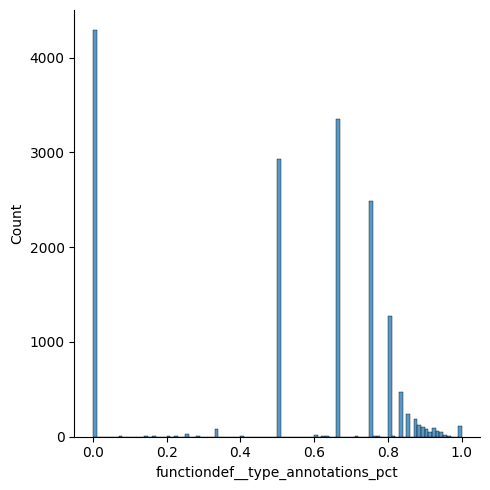

In [78]:
sns.displot(X['functiondef__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

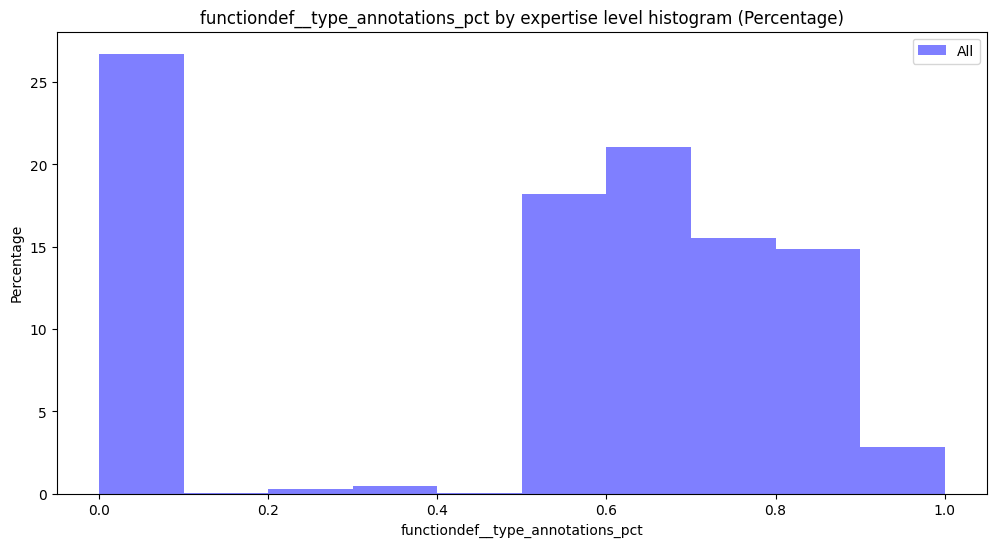

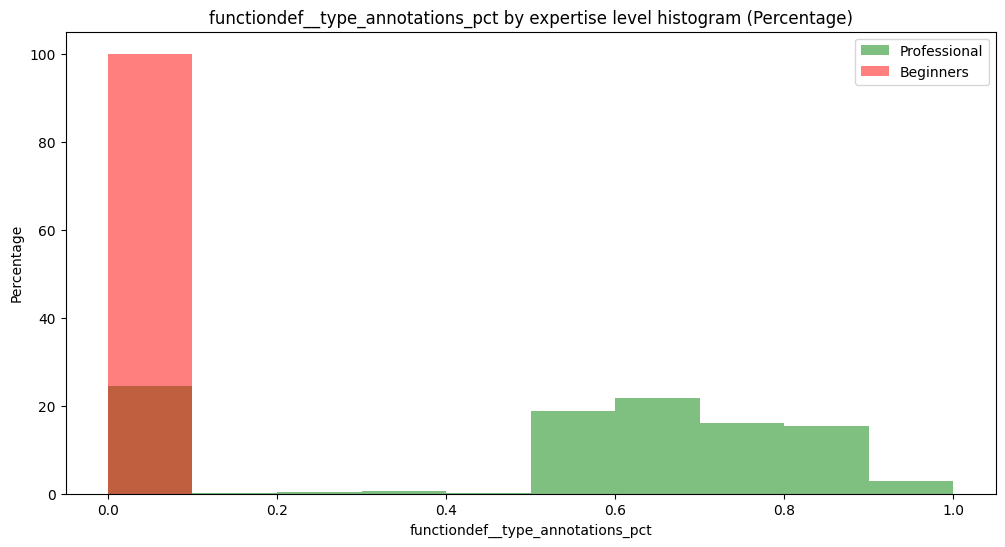

In [79]:
print_histogram(X, 'functiondef__type_annotations_pct', 'methoddef__expertise_level', bins=10, include_all=True, include_beginners=False, include_experts=False)
print_histogram(X, 'functiondef__type_annotations_pct', 'methoddef__expertise_level', bins=10, include_all=False)

In [80]:
print_outliers_for_df_column(X, 'functiondef__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: -0.08313699066638947
Rango valores atípicos extremos (Tukey): [-2.25,3.0]
Rango valores atípicos leves (Tukey): [-1.125,1.875]
Rango valores atípicos extremos (Fixed BoxPlot): [-1.5688313801133806,1.5909724049999643]
-3.0IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a -2.25 (Q1-3*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a -1.125 (Q1-1.5*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct superior a 1.875 (Q3+1.5*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct superior a 3.0 (Q3-3*IQR) para functiondef__type_annotations_pct. R

In [81]:
X[X['functiondef__type_annotations_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,methoddef__expertise_level_PROFESSIONAL,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,11763.000000,11763.000000,11763.000000,11763.000000,11763.000000,11763.0,11763.0,11763.000000,11763.000000,11763.000000,...,11763.000000,11763.000000,11763.000000,11763.0,11763.0,11763.000000,11763.000000,11763.000000,11763.000000,11763.000000
mean,0.077531,0.008501,0.120122,0.043356,0.091303,0.0,0.0,12.470798,0.139165,0.280201,...,0.593641,2.004081,0.681731,0.0,1.0,0.000255,0.000085,0.180906,0.000765,0.817989
std,0.267444,0.091813,0.325118,0.203667,0.288052,0.0,0.0,6.398361,0.346134,0.449116,...,0.491174,0.079214,0.135005,0.0,0.0,0.015969,0.009220,0.384957,0.027651,0.385870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.000000,0.000000,0.000000,...,0.000000,2.000000,0.071429,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,0.000000,2.000000,0.500000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.000000,0.000000,0.000000,...,1.000000,2.000000,0.666667,0.0,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,16.000000,0.000000,1.000000,...,1.000000,2.000000,0.750000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,64.000000,1.000000,1.000000,...,1.000000,4.000000,1.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable name_convention (19/19)
Esta variable es de tipo categórica y representa la name_convention del nombre del método.

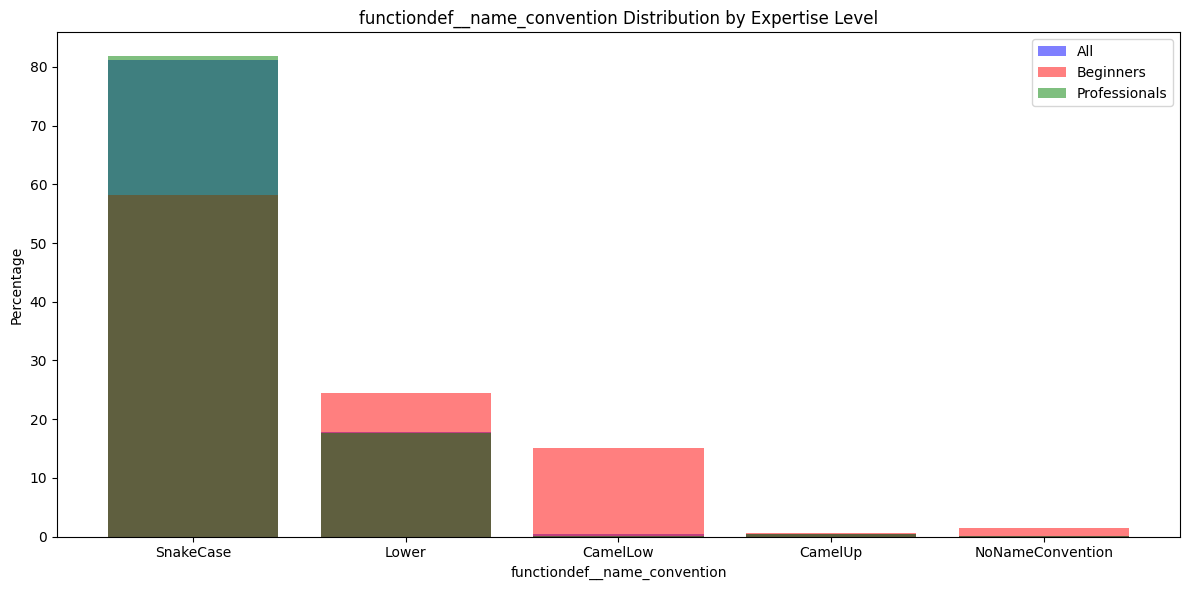

In [82]:
print_categorical_histogram(full_table, 'functiondef__name_convention',TABLE_TARGET)

In [83]:
print_frequency_anal_for_cat_var(full_table, 'functiondef__name_convention')

La variable functiondef__name_convention contiene 5 valores distintos.
El umbral de outlier es de 0.04%
La variable functiondef__name_convention toma el valor de SnakeCase en un 81.12% de los items.
La variable functiondef__name_convention toma el valor de Lower en un 17.79% de los items.
La variable functiondef__name_convention toma el valor de CamelLow en un 0.4922% de los items.
La variable functiondef__name_convention toma el valor de CamelUp en un 0.4299% de los items.
La variable functiondef__name_convention toma el valor de NoNameConvention en un 0.1682% de los items.


In [84]:
print_values_usage_for_cat_var(full_table, 'functiondef__name_convention', NAMING_CONVENTION_VALUES)

La variable functiondef__name_convention puede tomar 7 valores distintos
	5 (71.43%) valores utilizados
	2 (28.57%) valores NO utilizados
		La variable functiondef__name_convention nunca toma valor Upper.
		La variable functiondef__name_convention nunca toma valor Discard.


### IMPORTANTE
Dicard es outlier

## Multivariate

Isolation forest algorithm

In [85]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,methoddef__expertise_level,functiondef__name_convention,functiondef__number_of_characters,functiondef__is_private,functiondef__is_magic,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct
15652,False,True,False,False,False,False,False,BEGINNER,CamelLow,12,False,False,15,0.266667,False,1,False,False,2,0.0
15658,False,True,False,False,False,False,False,BEGINNER,CamelLow,16,False,False,3,0.000000,False,1,False,False,2,0.0
15662,False,True,False,False,False,False,False,BEGINNER,CamelLow,11,False,False,3,0.000000,False,1,False,False,2,0.0
15688,False,True,False,False,False,False,False,BEGINNER,CamelLow,12,False,False,15,0.266667,False,1,False,False,2,0.0
15690,False,True,False,False,False,False,False,BEGINNER,CamelLow,16,False,False,3,0.000000,False,1,False,False,2,0.0
15693,False,True,False,False,False,False,False,BEGINNER,CamelLow,11,False,False,3,0.000000,False,1,False,False,2,0.0
15714,False,True,False,False,False,False,False,BEGINNER,CamelLow,12,False,False,15,0.266667,False,1,False,False,2,0.0
15716,False,True,False,False,False,False,False,BEGINNER,CamelLow,16,False,False,3,0.000000,False,1,False,False,2,0.0
15719,False,True,False,False,False,False,False,BEGINNER,CamelLow,11,False,False,3,0.000000,False,1,False,False,2,0.0
15826,False,False,False,False,False,False,False,BEGINNER,CamelUp,7,False,False,22,0.590909,False,0,False,True,2,0.0


### IMPORTANTE
Hay que analizar los 111 los outliers de la tabla.

In [86]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
methoddef__is_class_method,18.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
methoddef__is_static_method,18.0,0.500000,0.514496,0.0,0.0,0.500000,1.000000,1.000000
methoddef__is_constructor_method,18.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
methoddef__is_abstract_method,18.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
methoddef__is_property,18.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
methoddef__is_wrapper,18.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
methoddef__is_cached,18.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
functiondef__number_of_characters,18.0,11.000000,2.807553,7.0,10.0,11.000000,12.000000,16.000000
functiondef__is_magic,18.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
functiondef__is_private,18.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


In [87]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
methoddef__is_class_method,16033.0,0.060313,0.238073,0.0,0.0,0.000000,0.00,1.0
methoddef__is_static_method,16033.0,0.015156,0.122178,0.0,0.0,0.000000,0.00,1.0
methoddef__is_constructor_method,16033.0,0.118693,0.323437,0.0,0.0,0.000000,0.00,1.0
methoddef__is_abstract_method,16033.0,0.033369,0.179603,0.0,0.0,0.000000,0.00,1.0
methoddef__is_property,16033.0,0.073848,0.261531,0.0,0.0,0.000000,0.00,1.0
methoddef__is_wrapper,16033.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.0
methoddef__is_cached,16033.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.0
functiondef__number_of_characters,16033.0,12.879125,6.868906,1.0,8.0,11.000000,17.00,64.0
functiondef__is_magic,16033.0,0.139026,0.345984,0.0,0.0,0.000000,0.00,1.0
functiondef__is_private,16033.0,0.241065,0.427743,0.0,0.0,0.000000,0.00,1.0
